### Setup
###### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

load data & store in Dataframe

In [2]:
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## 1. Linear & Multiple Regression

#### SLR (Simple Linear Regression)

###### X : Response Variable
###### Y : Predictor Variable

###### LR Function - Yhat = a + bX
<ul>
    <li>a refers to <b>Intercept</b></li>
    <li>b refers to <b>Slope (Regression Line - Coefficient)</b></li>
</ul>

<h4>Loading modules for LR</h4>


In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Predicting Car Price based on MPG (Miles Per Gallon)

<ul><li>Getting Data Ready <b> X & Y</li></ul>

In [6]:
X = df[['highway-mpg']]
Y = df[['price']]

In [7]:
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Predictions from Linear Model

In [10]:
Yhat = lm.predict(X)
Yhat[0:5]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

<h5>Getting Intercept & Coefficient</h5>

In [13]:
print("Coefficient (Slope) - ", lm.coef_, "\nIntercept - ", lm.intercept_)

Coefficient (Slope) -  [[-821.73337832]] 
Intercept -  [38423.30585816]


<h5>Hypothesis</h5>
    <ul>
    <li>
        Hypothesis (SLR)
    </li>
    <li> <b> Yhat = 38423.306 - 821.7333*X </b></li>
    </ul>

### Visualizing the Model

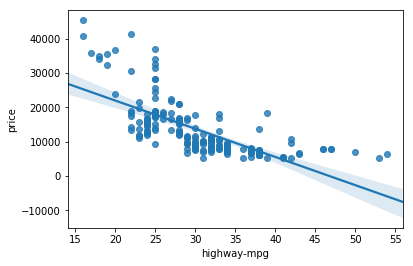

In [27]:
import seaborn as sns
sns.regplot(X['highway-mpg'], Y['price'])

##### Model shows Negative Linear Regression - As MPG increases, Price decreases

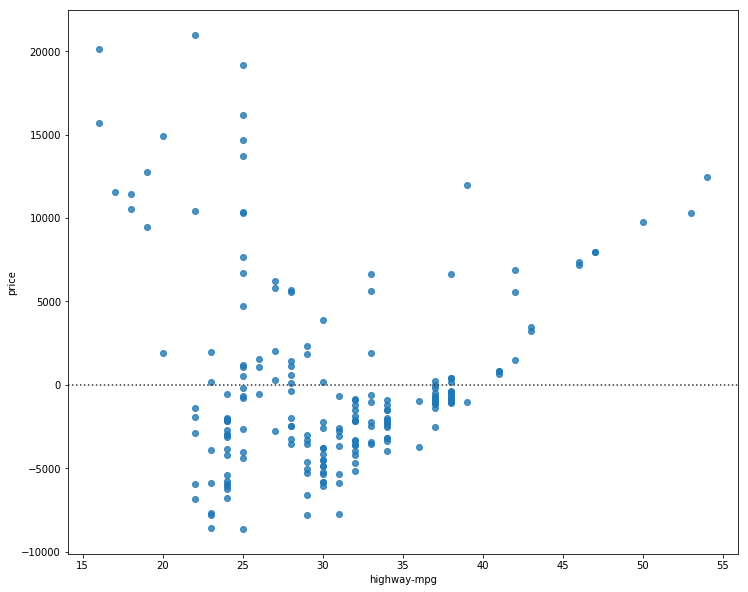

In [50]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

### Residual Plot

<h2 style='color: DarkRed'>Multiple Linear Regression<h2>

<p> Predicting Car Price using more than 1 variable </p>

$$
Y: Response \ Variable\\
X_1 :Predictor\ Variable \ 1\\
X_2: Predictor\ Variable \ 2\\
X_3: Predictor\ Variable \ 3\\
X_4: Predictor\ Variable \ 4\\
$$

$$
a: intercept\\
b_1 :coefficients \ of\ Variable \ 1\\
b_2: coefficients \ of\ Variable \ 2\\
b_3: coefficients \ of\ Variable \ 3\\
b_4: coefficients \ of\ Variable \ 4\\
$$

###### Equation - Hypothesis

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

In [33]:
## Correlation Matrix
df.corr()[['price']]

,price
symboling,-0.082391
normalized-losses,0.133999
wheel-base,0.584642
length,0.690628
width,0.751265
height,0.135486
curb-weight,0.834415
engine-size,0.872335
bore,0.543155
stroke,0.082310


#### Finding max correlated features

In [45]:
df_price_corr = df.corr()[['price']]
df_price_corr.loc[(df_price_corr['price'] > 0.7) | (df_price_corr['price'] < -0.7)]

,price
width,0.751265
curb-weight,0.834415
engine-size,0.872335
horsepower,0.809575
highway-mpg,-0.704692
price,1.000000
city-L/100km,0.789898


##### Most Correlated Columns - These columns are affecting the price of Car by maximum

###### Choosing Features to fit the model

<ul>
    <li>
        Horsepower
    </li>
    <li>
        Curb-weight
    </li>
    <li>
        Engine-size
    </li>
    <li>
        Highway-mpg (-vely Related)
    </li>
</ul>
    
    
    
    
        


In [46]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [47]:
lm.fit(Z, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [48]:
print("Coefficient (Slope) - ", lm.coef_, "\nIntercept - ", lm.intercept_)

Coefficient (Slope) -  [53.49574423  4.70770099 81.53026382 36.05748882] 
Intercept -  -15806.624626329234


$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

<b>Price</b> = 15806.624626329234 + 53.49574423 x <b>horsepower</b> + 4.70770099 x <b>curb-weight</b> + 81.53026382 x <b>engine-size</b> + 36.05748882 x <b>highway-mpg</b>

In [51]:
Y_hat = lm.predict(Z)

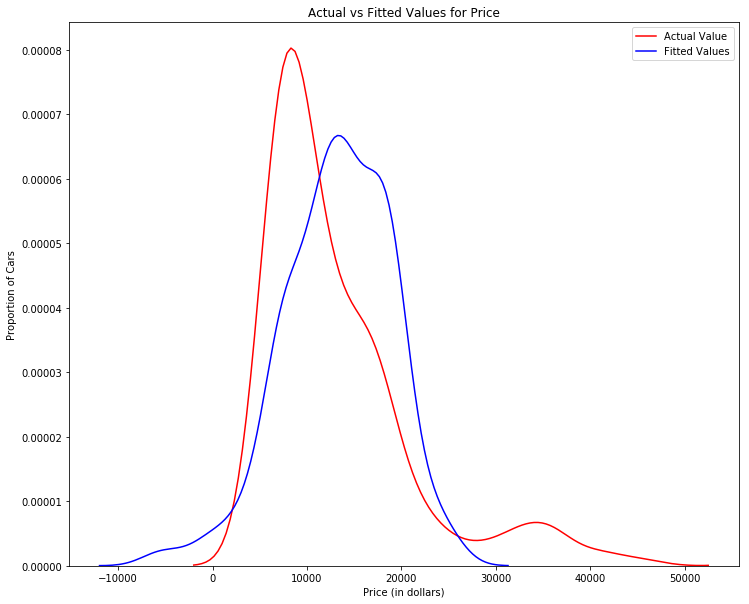

In [52]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

#### Distribution plot
 <b><p style='color : red'> Actual </p>  V/S  <p style='color : blue'> Predicted </p> </b>
    
<p>We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.</p>

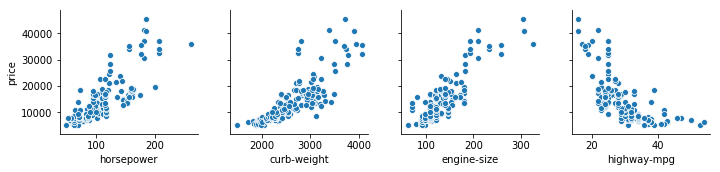

In [63]:
sns.pairplot(data=df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg', 'price']], y_vars=['price'], x_vars=['horsepower', 'curb-weight', 'engine-size', 'highway-mpg'])

##### Plotting against each Feature

<h1 style='color : darkred'> Polynomial Regression & Pipelines

<p><b>Polynomial regression</b> is a particular case of the general linear regression model or multiple linear regression models.</p>

<center><b>Quadratic - 2nd order</b></center>
$$
Yhat = a + b_1 X^2 +b_2 X^2 
$$


<center><b>Cubic - 3rd order</b></center>
$$
Yhat = a + b_1 X^2 +b_2 X^2 +b_3 X^3\\
$$


<center><b>Higher order</b>:</center>
$$
Y = a + b_1 X^2 +b_2 X^2 +b_3 X^3 ....\\
$$

In [66]:
## Plotting Polynomial Feature

def Plotpolly(model, independent_variable, dependent_variable, Name):
    ## Creating Test Data
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)
    
    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

### Developing a better model for Highway-MPG & Price
##### Linear model did not provide the best fit

In [67]:
x = df['highway-mpg']
y = df['price']

In [68]:
## Using Thrid order polynomial (Cubic)
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


###### Equation for Cubic Model (Hypothesis)

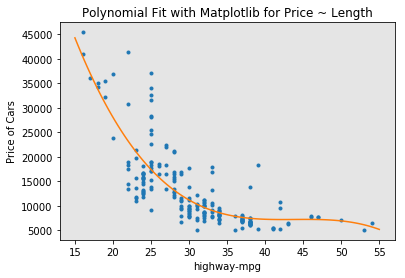

In [69]:
Plotpolly(p, x, y, 'highway-mpg')

In [71]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

##### Polynomial model performed better than linear model - Via Plotting

<h1 style='color: darkred'>Pipeline

<b>It simplifies the steps of processing the data, via Pipeline module & also Standard Scalar

In [74]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [76]:
Input = [('scale', StandardScaler()),
        ('polynomial', PolynomialFeatures(degree=2)),
        ('model', LinearRegression())]

In [79]:
pipe = Pipeline(Input)
pipe

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [82]:
pipe.fit(Z, y)

C:\Users\laksh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\laksh\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [85]:
ypipe = pipe.predict(Z)
ypipe[0:4].reshape(-1, 1)

C:\Users\laksh\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([[13102.74784201],
       [13102.74784201],
       [18225.54572197],
       [10390.29636555]])

# Evaluation of Model

<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>

<h3>Model 1: Simple Linear Regression</h3>

In [86]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


In [88]:
Yhat=lm.predict(X)

In [89]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


<h3>Model 2: Multiple Linear Regression</h3>

In [91]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [92]:
Y_predict_multifit = lm.predict(Z)
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


#### Between, SLR & MLR - The MSE is reduced by 3 times (More Features, more close to prediction)

<h3>Model 3: Polynomial Fit</h3>

In [94]:
from sklearn.metrics import r2_score
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


In [95]:
mean_squared_error(df['price'], p(x))

20474146.426361218

<h2>Prediction and Decision Making</h2>
<h3>Prediction (Steps to follow)</h3>

In [97]:
## Creating New Input
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [98]:
lm.fit(X, Y)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [102]:
yhat=lm.predict(new_input) ## Test Data

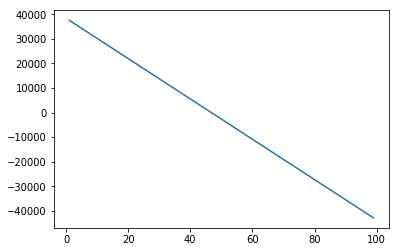

In [103]:
plt.plot(new_input, yhat)
plt.show()

<h3>Decision Making: Determining a Good Model Fit</h3>

<h4>Let's take a look at the values for the different models.</h4>

<ul>
    <li><i>What is a good R-squared value?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the higher R-squared value is a better fit</b> for the data.
<ul>
    <li><i>What is a good MSE?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the smallest MSE value is a better fit</b> for the data.</p>

<p>Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.4965911884339176</li>
    <li>MSE: 3.16 x10^7</li>
</ul>
</p>
    
<p>Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-squared: 0.8093562806577457</li>
    <li>MSE: 1.19 x10^7</li>
</ul>
</p>
    
<p>Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.674194666390652</li>
    <li>MSE: 2.04 x 10^7</li>
</ul>
</p>

<h3> Conclusion </h3>
<p>Here, Comparing the R^2 & MSE of all 3 models, <b><hr><span style='color:darkred'>Multiple Linear Regression</span> </hr> is the best model</b> to be able to predict the price from the dataset</p>